### Ritter et al. (2022), J Seismol: **Fig. S4 left** - Piercing points in the lowermost mantle related to SWSMs at BFO

-----------------------------------------------------------------------
> This [Jupyter Notebook](https://jupyter.org/) (supported by [Jupyter Lab](https://jupyter.org/)) reproduces **Fig. S4 left** of **_Ritter, J. R. R., Fröhlich, Y., Sanz Alonso, Y. & Grund, M. (2022)_**. Short-scale laterally varying SK(K)S shear wave splitting at BFO, Germany – implications for the determination of anisotropic structures. _Journal of Seismology_. https://doi.org/10.1007/s10950-022-10112-w.
>
> Author: Yvonne Fröhlich (ORCID: https://orcid.org/0000-0002-8566-0619)
>
> Created: 2022-July
>
> For bug reports, suggestions, or recommendation please open an issue or submit a pull request directly on [GitHub](https://github.com/yvonnefroehlich/gmt-pygmt-plotting).

-----------------------------------------------------------------------

Import required package which must be installed on your system to run this Jupyter Notebook:
* [_**PyGMT**_](https://www.pygmt.org/latest/) release [v0.7.0](https://www.pygmt.org/v0.7.0/) + [_**GMT**_](https://www.generic-mapping-tools.org/) release [6.4.0](https://docs.generic-mapping-tools.org/6.4/)

In [1]:
import os
import pygmt as gmt

---------------

**(1) Set up**

---------------

In [2]:
# -----------------------------------------------------------------------------
# General stuff
myfontsize = "9p"
mypngdpi = 360  # resolution in dpi of output figure for PNG format
fname_fig_out = "RFSG_FigS4_left_swsm"  # name of output figure

# -----------------------------------------------------------------------------
# Coordinates of recording station Black Forest Observatory BFO
lon_BFO = 8.330  # degrees East
lat_BFO = 48.331  # degrees North

# -----------------------------------------------------------------------------
# Plate boundaries (Bird 2003)
file_platbound = "plate_boundaries_Brid_2003.txt"

# -----------------------------------------------------------------------------
# Colors
color_land = "gray90"  # gray level -> light gray
color_platbound = "216.750/82.875/24.990"  # -> dark orange
color_station_symbol = "255/215/0"  # = "gold"
color_station_lable = "162/20/47"  # -> dark red
color_null = "white"

# -----------------------------------------------------------------------------
# Piercing points
marker_size_pp = "0.18c"  # centimeter
outline_width_pp = "0.8p"  # point
alpha_pp = "@30"  # transparency in percentage (0 equals opaque)

# -----------------------------------------------------------------------------
# Ray paths
alpha_ray = "@97"
color_ray_K_N = "black"
color_ray_K_NN = "black"
color_ray_KK_N = "black"
color_ray_KK_NN = "black"
incols_ray = [1, 0]  # order of input columns, zero-based indexing

# -----------------------------------------------------------------------------
# Box around map scale, legends, colorbars
# +g fill color
# +p outline thickness and color
# +r rounded edges
box_standard = "+gwhite@30+p0.8p,black+r"

Set map projection and region of study area:
- [Lambert Conic Conformal Projection](https://www.pygmt.org/v0.7.0/projections/conic/conic_lambert.html): **L**`lon0/lat0/lat1/lat2/width`

In [3]:
# -----------------------------------------------------------------------------
# Projection

# Define projection center
lon0_lamb = 7  # degrees East
lat0_lamb = 48  # degrees North

# Define standard parallels (only these two are distortion-free)
lat1_lamb = 45  # degrees North
lat2_lamb = 55

# Define width of map
width_lamb = "15c"  # 15 centimeters

JJ_used = (
    "L"
    + str(lon0_lamb)
    + "/"
    + str(lat0_lamb)
    + "/"
    + str(lat1_lamb)
    + "/"
    + str(lat2_lamb)
    + "/"
    + width_lamb
)

# -----------------------------------------------------------------------------
# Region
lonmin_lamb = -35  # degrees East
lonmax_lamb = abs(lonmin_lamb) + 2 * lon0_lamb  # symmetric around lon0
latmin_lamb = 25  # degrees North
latmax_lamb = 70

RR_used = (
    str(lonmin_lamb)
    + "/"
    + str(lonmax_lamb)
    + "/"
    + str(latmin_lamb)
    + "/"
    + str(latmax_lamb)
)

Create a cyclic colormap using the [`pygmt.makecpt`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.makecpt.html) function:
* fast polarization direction: _cmocean_ colormaps - _phase_ ([Thuny et al. 2016](http://dx.doi.org/10.5670/oceanog.2016.66))

In [4]:
cmap_phi_out = "phase_resampled_phi.cpt"

gmt.makecpt(
    cmap="phase",  # buld-in up on GMT 6.4.0
    output=cmap_phi_out,
    series="-90/90",  # min/max
    cyclic=True,
)

cmap_phi = cmap_phi_out

Set values to adjust the default settings of _GMT_ (see https://docs.generic-mapping-tools.org/6.4/gmt.conf.html).

In [5]:
my_PS_MEDIA = "A4"
my_PS_PAGE_ORIENTATION = "portrait"
my_MAP_FRAME_TYPE = "fancy+"  # map frame style
my_MAP_FRAME_WIDTH = "3p"  # thickness of map frame
# formatting template how geographical coordinates are plotted
# F adds N, E, S, W after degree sign
my_FORMAT_GEO_MAP = "dddF"
my_FONT_LABEL = myfontsize
my_FONT_ANNOT_PRIMARY = myfontsize
my_FONT_ANNOT_SECONDARY = myfontsize
my_MAP_FRAME_PEN = "0.8p"  # thickness of border around scale
my_MAP_ANNOT_OFFSET = "3p"  # distance of annotations from scale
my_MAP_LABEL_OFFSET = "5p"  # distance of label from scale
my_MAP_TICK_LENGTH_PRIMARY = "5p"  # length of scale ticks; minor half of major
my_COLOR_NAN = "white"  # color for NaN, default 127.5

my_FONT_ANNOT_PRIMARY_legend = my_FONT_LABEL

-----------------------------

**(2) Create geographic map**

-----------------------------

Using the [`pygmt.Figure.show`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.show.html) method you can let the figure be displayed directly inside your IDE (Integrated Development Environment) or outside of it by setting the `method` parameter to `"external"`.

Create an instance or object of the [`pygmt.Figure`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.html) class. In the following steps various plotting elements are added in a stacking fashion.

In [6]:
fig = gmt.Figure()

Change the _GMT_ default values globally (see https://docs.generic-mapping-tools.org/6.4/gmt.conf.html).

In [7]:
gmt.config(
    PS_MEDIA=my_PS_MEDIA,
    PS_PAGE_ORIENTATION=my_PS_PAGE_ORIENTATION,
    MAP_FRAME_TYPE=my_MAP_FRAME_TYPE,
    FORMAT_GEO_MAP=my_FORMAT_GEO_MAP,
    MAP_FRAME_WIDTH=my_MAP_FRAME_WIDTH,
    FONT_LABEL=my_FONT_LABEL,
    FONT_ANNOT_PRIMARY=my_FONT_ANNOT_PRIMARY,
    FONT_ANNOT_SECONDARY=my_FONT_ANNOT_SECONDARY,
    MAP_FRAME_PEN=my_MAP_FRAME_PEN,
    MAP_ANNOT_OFFSET=my_MAP_ANNOT_OFFSET,
    MAP_LABEL_OFFSET=my_MAP_LABEL_OFFSET,
    MAP_TICK_LENGTH_PRIMARY=my_MAP_TICK_LENGTH_PRIMARY,
    COLOR_NAN=my_COLOR_NAN,
)

Generate a basic map using the [`pygmt.Figure.coast`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.coast.html) method.

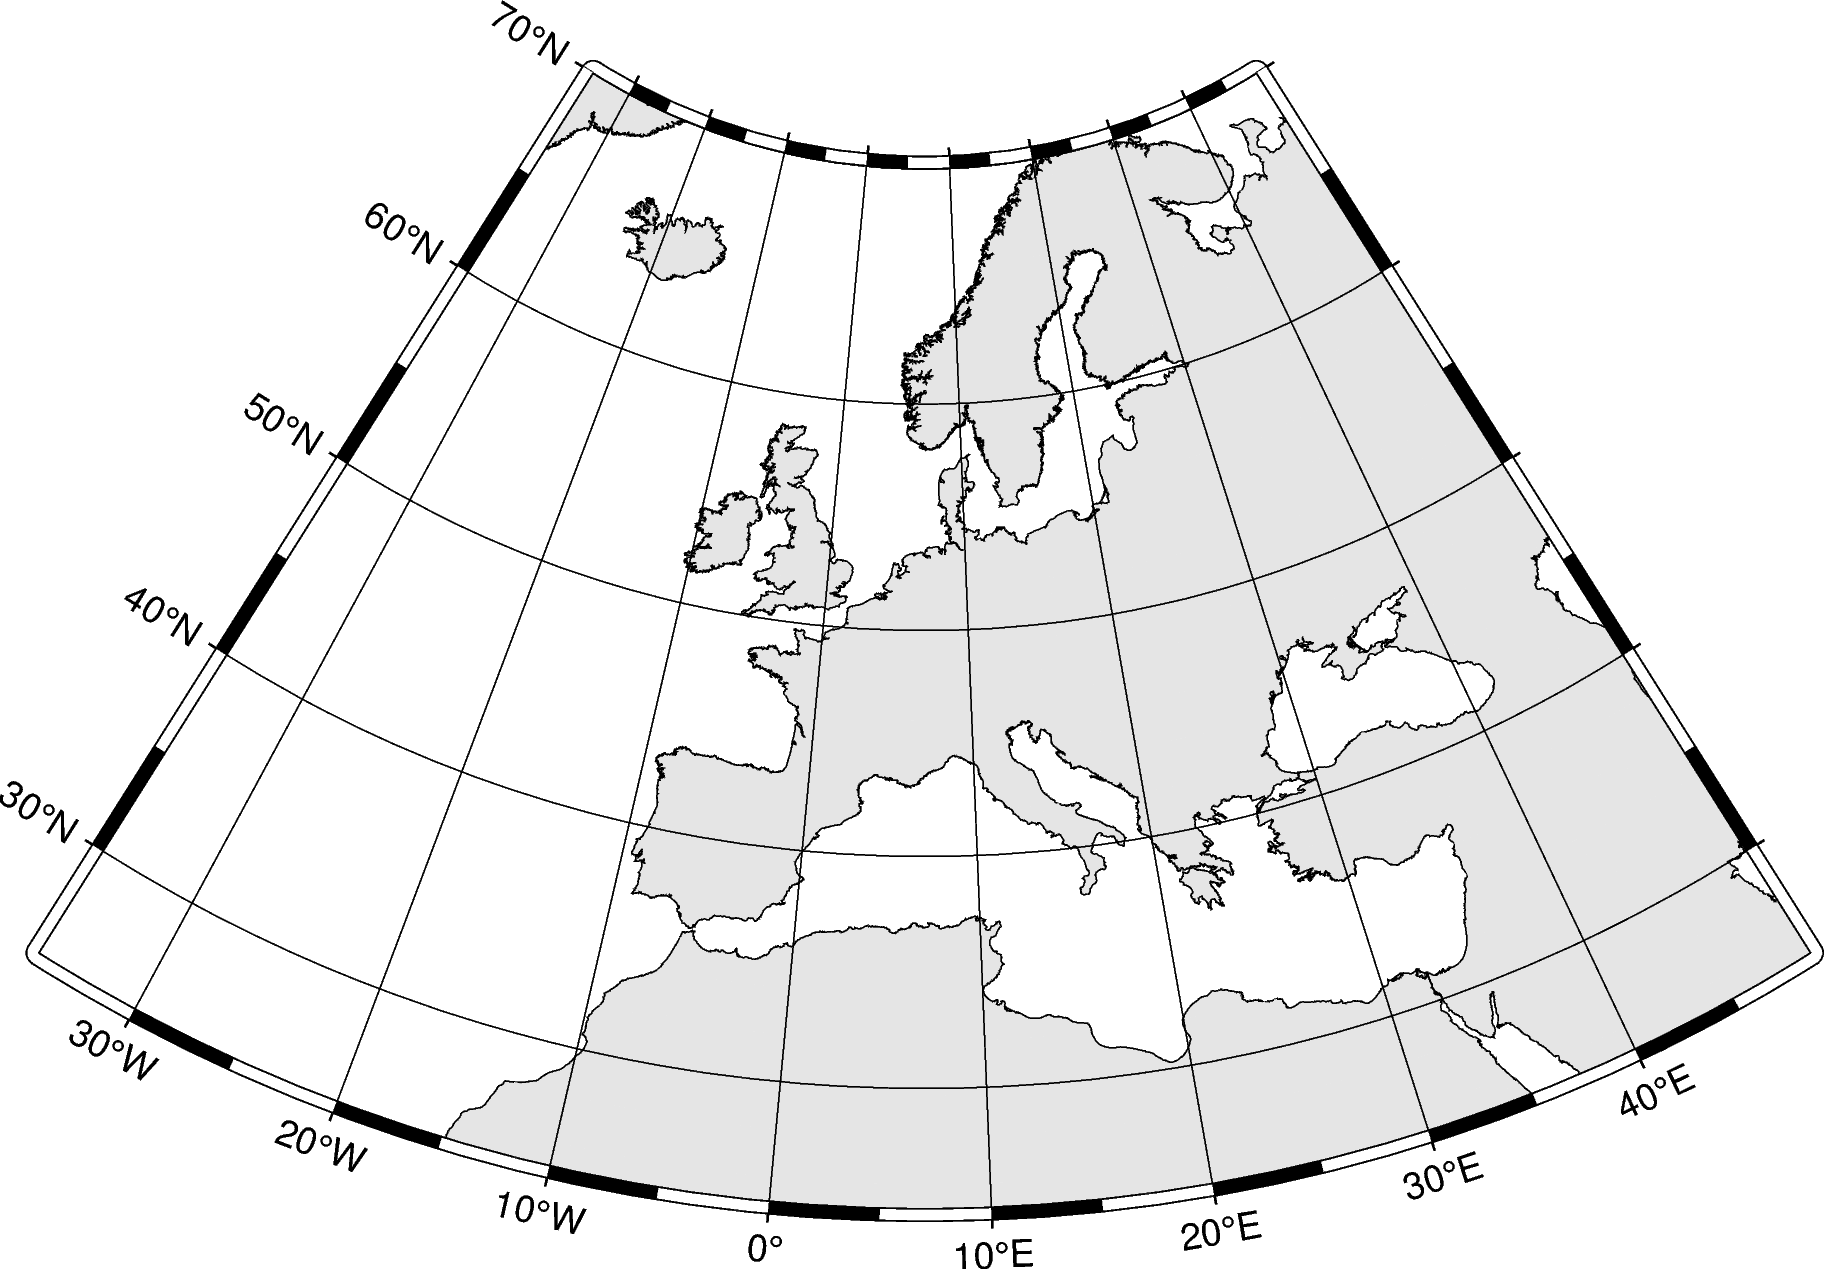

In [8]:
# a annotations, here every 10 degrees
# g grid lines, here every 10 degrees
# f frame or ticks, here every 5 degrees
# WSne annotations at South and West boundaries
frame_used = ["a10g10f5", "WSne"]

fig.coast(
    projection=JJ_used,
    region=RR_used,
    frame=frame_used,
    land=color_land,
    resolution="h",  # high
    area_thresh="30000",
    shorelines="black",
)

fig.show()

Plot the plate boundaries ([Bird 2003](https://doi.org/10.1029/2001GC000252)) using the [`pygmt.Figure.plot`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.plot.html) method.

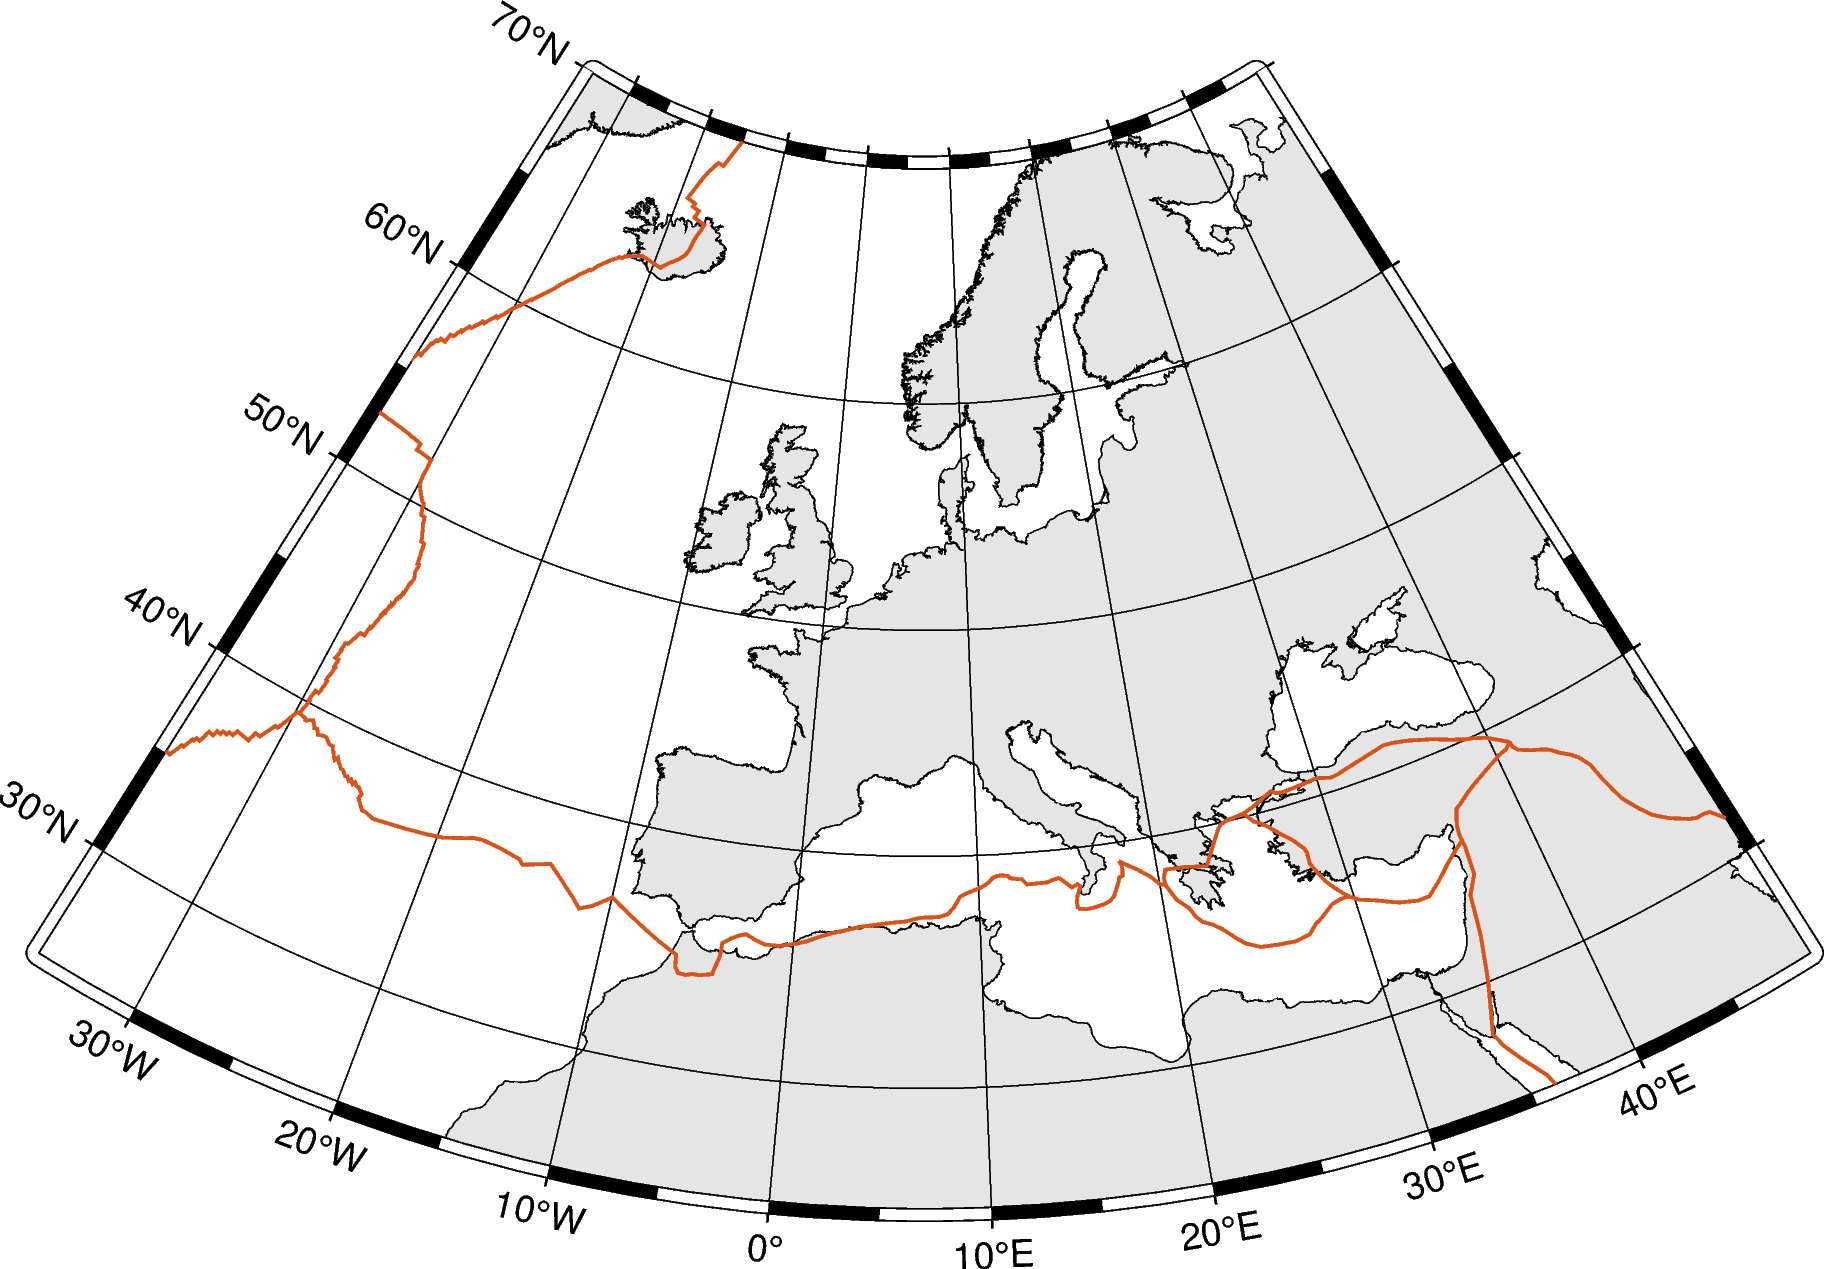

In [9]:
fig.plot(
    data=file_platbound,
    pen="0.8p," + color_platbound,
)

fig.show()

Plot the (projected) ray paths. The semi-transparency generates some kind of a ray density.

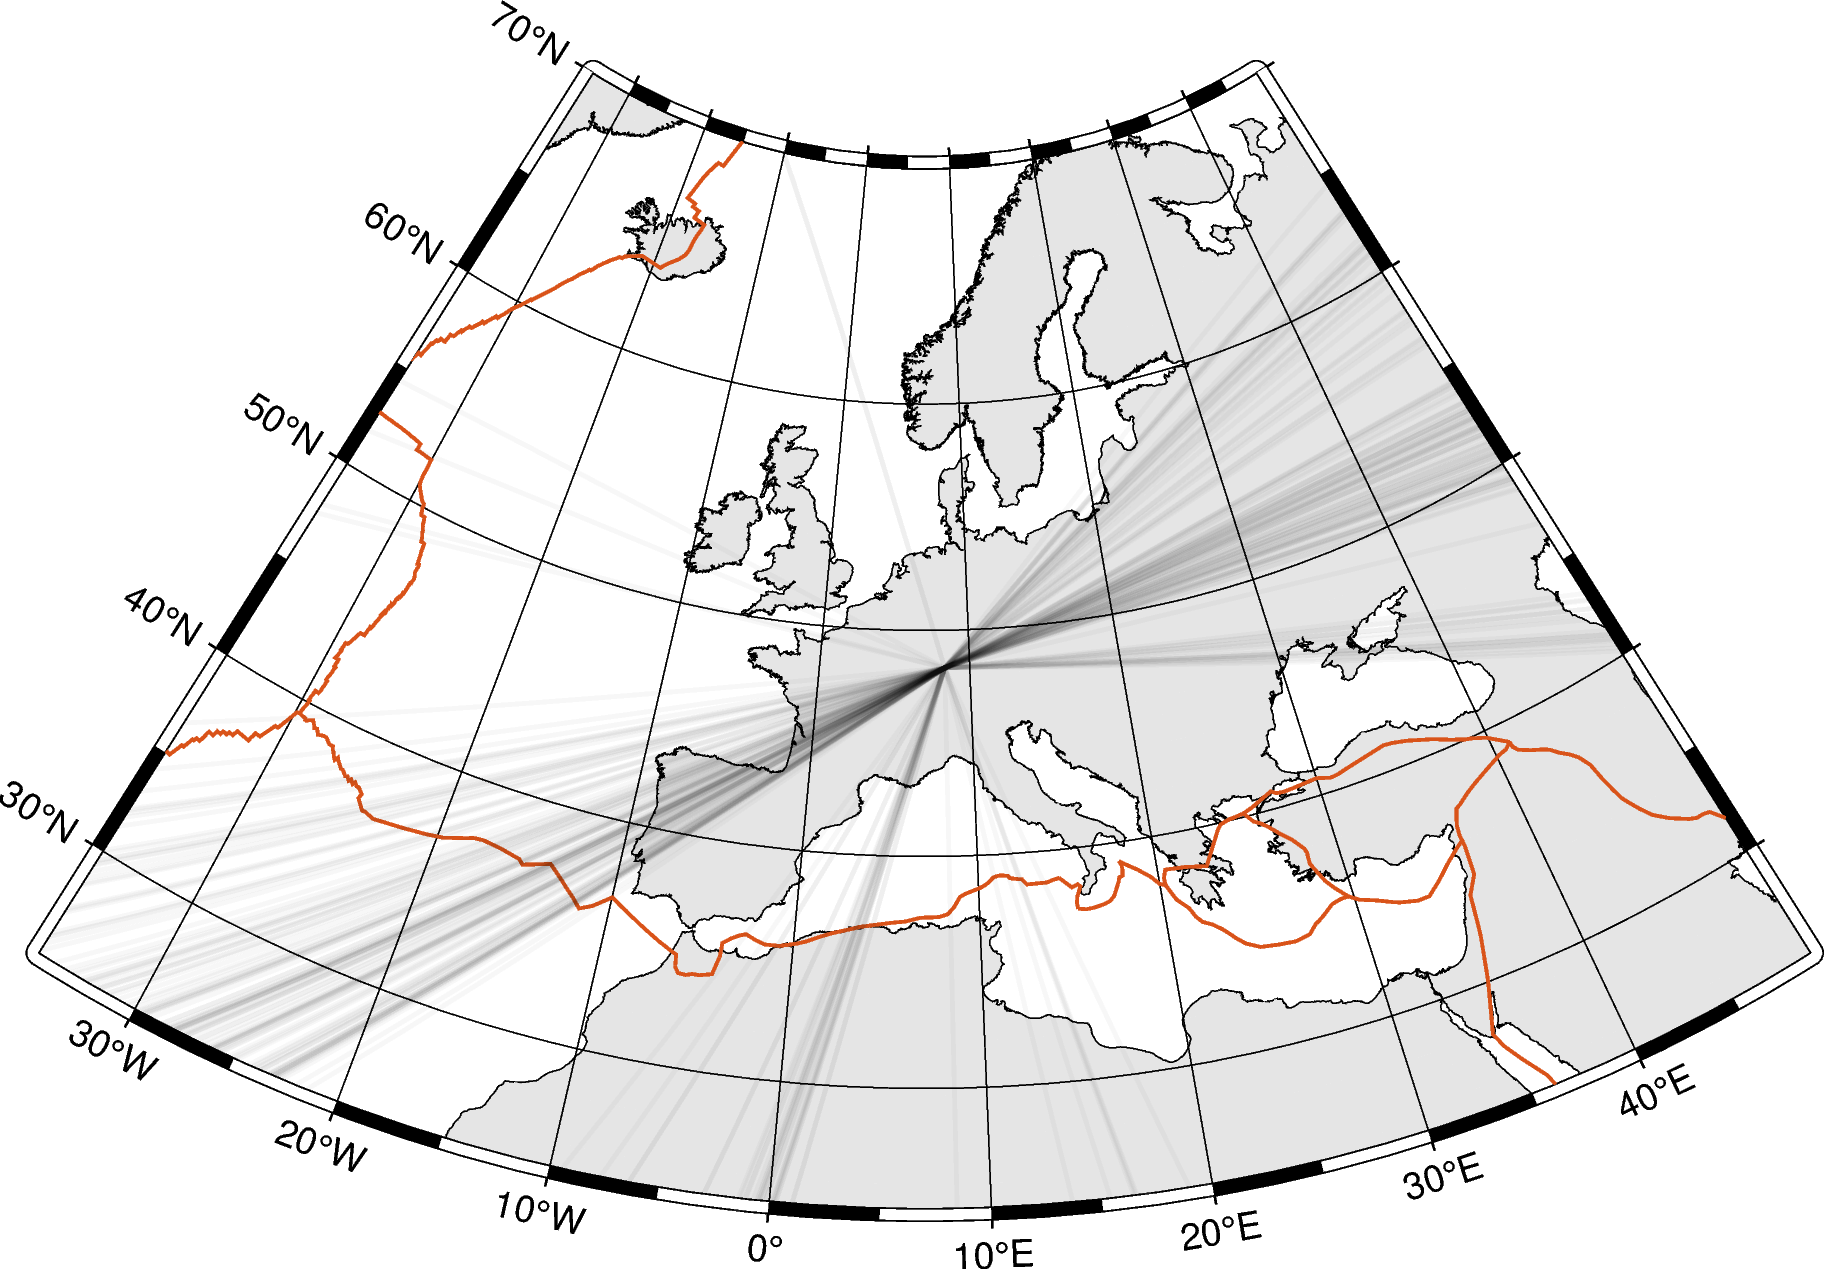

In [10]:
file_raypath_same = "data_FigS4_left_swsm/BFO_rays_swsm_"
file_raypath_K_N = file_raypath_same + "K_N_goodfair.txt"
file_raypath_K_NN = file_raypath_same + "K_NN_goodfair.txt"
file_raypath_KK_N = file_raypath_same + "KK_N_goodfair.txt"
file_raypath_KK_NN = file_raypath_same + "KK_NN_goodfair.txt"

# null, SKS
fig.plot(
    data=file_raypath_K_N,
    pen="1p," + color_ray_K_N + alpha_ray,
    incols=incols_ray,  # order of input columns, zero-based indexing
)
# null, SKKS
fig.plot(
    data=file_raypath_KK_N,
    pen="1p," + color_ray_KK_N + alpha_ray,
    incols=incols_ray,
)
# spit, SKS
fig.plot(
    data=file_raypath_K_NN,
    pen="1p," + color_ray_K_NN + alpha_ray,
    incols=incols_ray,
)
# split, SKKS
fig.plot(
    data=file_raypath_KK_NN,
    pen="1p," + color_ray_KK_NN + alpha_ray,
    incols=incols_ray,
)

fig.show()

Plot the piercing points in 2700 km depth (externally and previously calculated after the _iasp91_ Earth model ([Kennett & Engdahl 1991](https://doi.org/10.1111/j.1365-246X.1991.tb06724.x))).

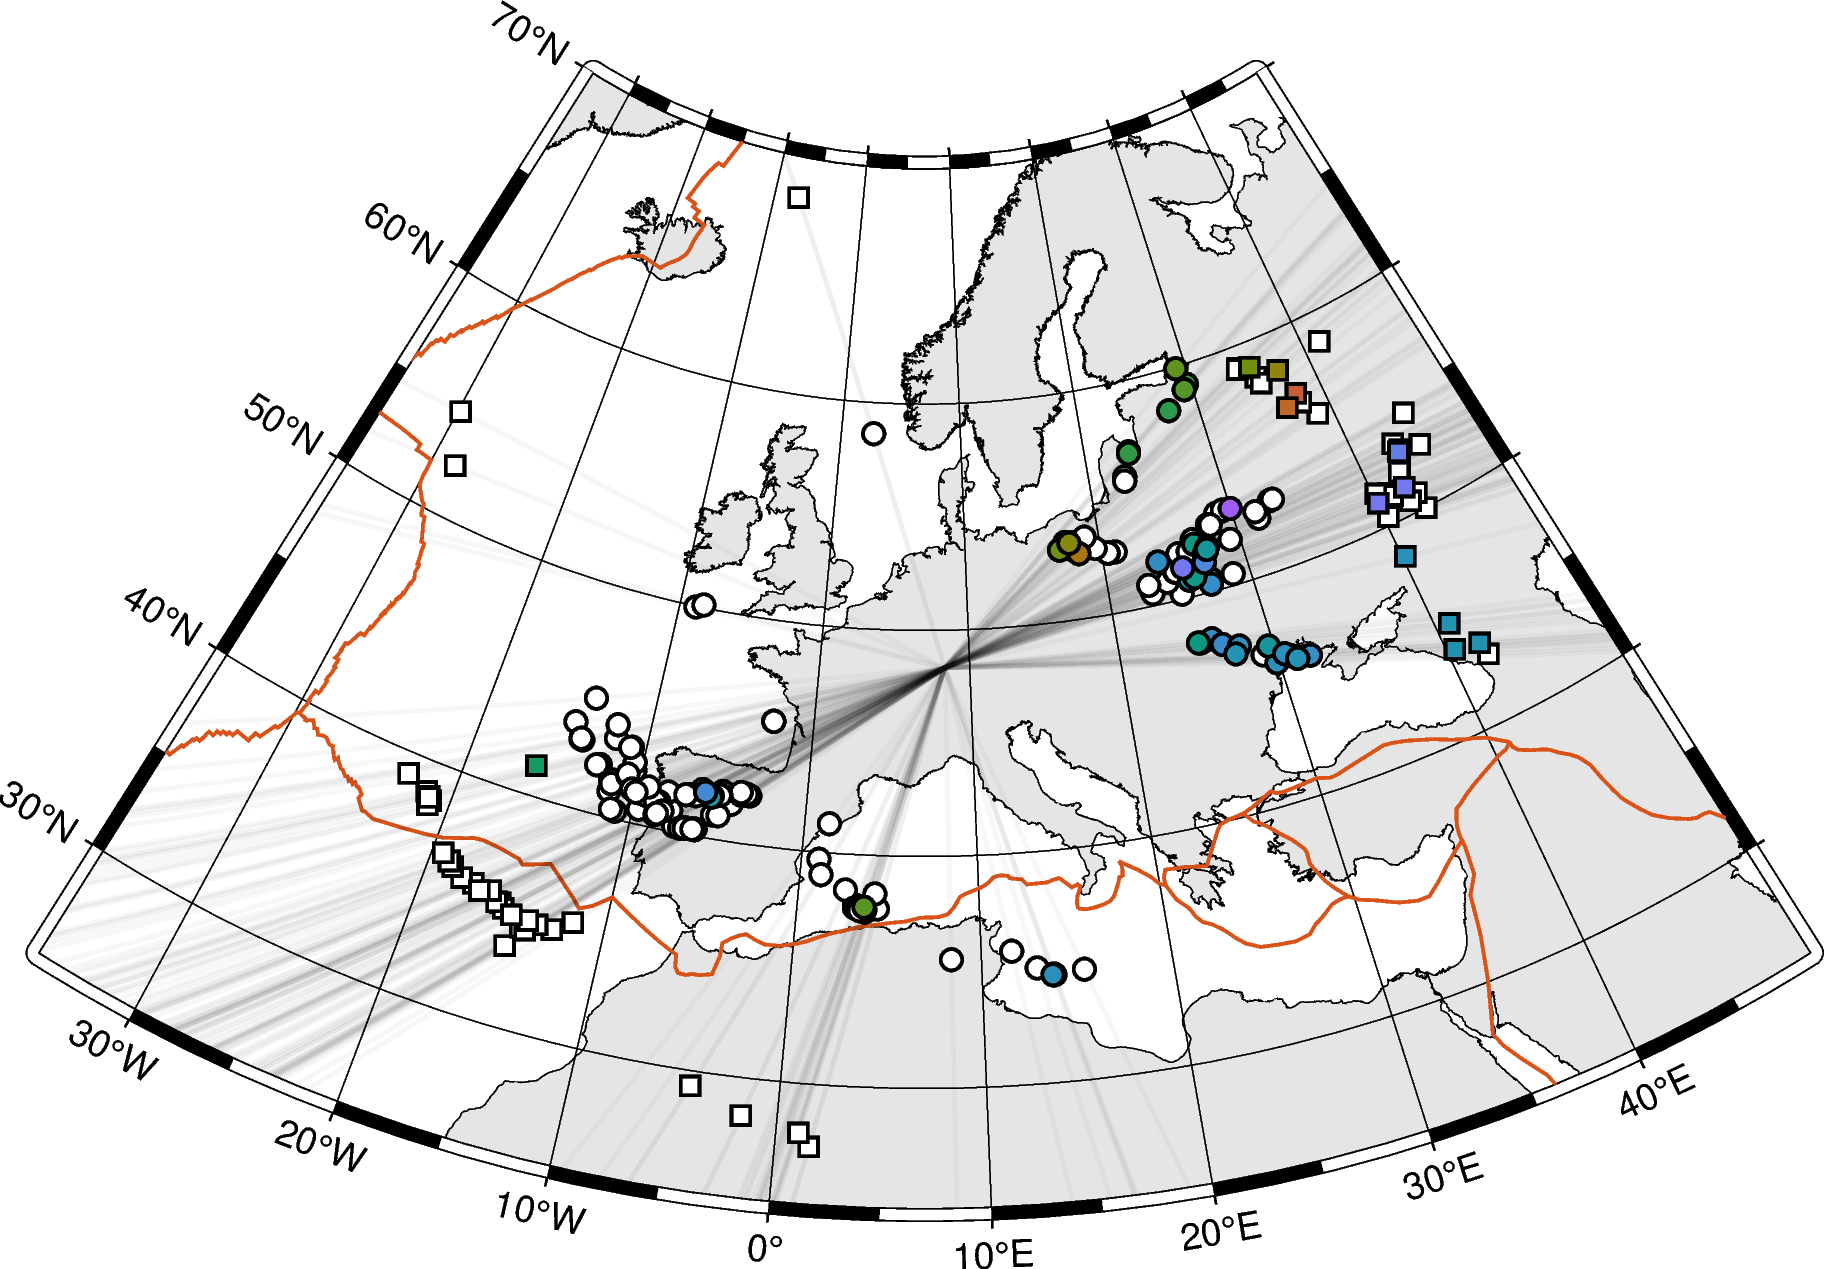

In [11]:
data_pp_same = "data_FigS4_left_swsm/BFO_pp2700km_"
data_K_N_pp = data_pp_same + "K_sp_N_goodfair.txt"
data_K_NN_pp = data_pp_same + "K_sp_NN_goodfair.txt"
data_KK_N_pp = data_pp_same + "KK_sp_N_goodfair.txt"
data_KK_NN_pp = data_pp_same + "KK_sp_NN_goodfair.txt"

# null, SKS
fig.plot(
    data=data_K_N_pp,
    style="C" + marker_size_pp,  # circle
    color=color_null,  # fill color
    pen=outline_width_pp + ",black",  # outline thickness and color
)
# null, SKKS
fig.plot(
    data=data_KK_N_pp,
    style="S" + marker_size_pp,  # square
    color=color_null,
    pen=outline_width_pp + ",black",
)
# split, SKS
fig.plot(
    data=data_K_NN_pp,
    style="C" + marker_size_pp,
    cmap=cmap_phi,  # color map
    pen=outline_width_pp + ",black",
)
# split, SKKS
fig.plot(
    data=data_KK_NN_pp,
    style="S" + marker_size_pp,
    cmap=cmap_phi,
    pen=outline_width_pp + ",black",
)

fig.show()

Add symbol and station code of recording station BFO as well as depth of piercing points using the [`pygmt.Figure.plot`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.plot.html) and [`pygmt.Figure.text`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.text.html) methods.

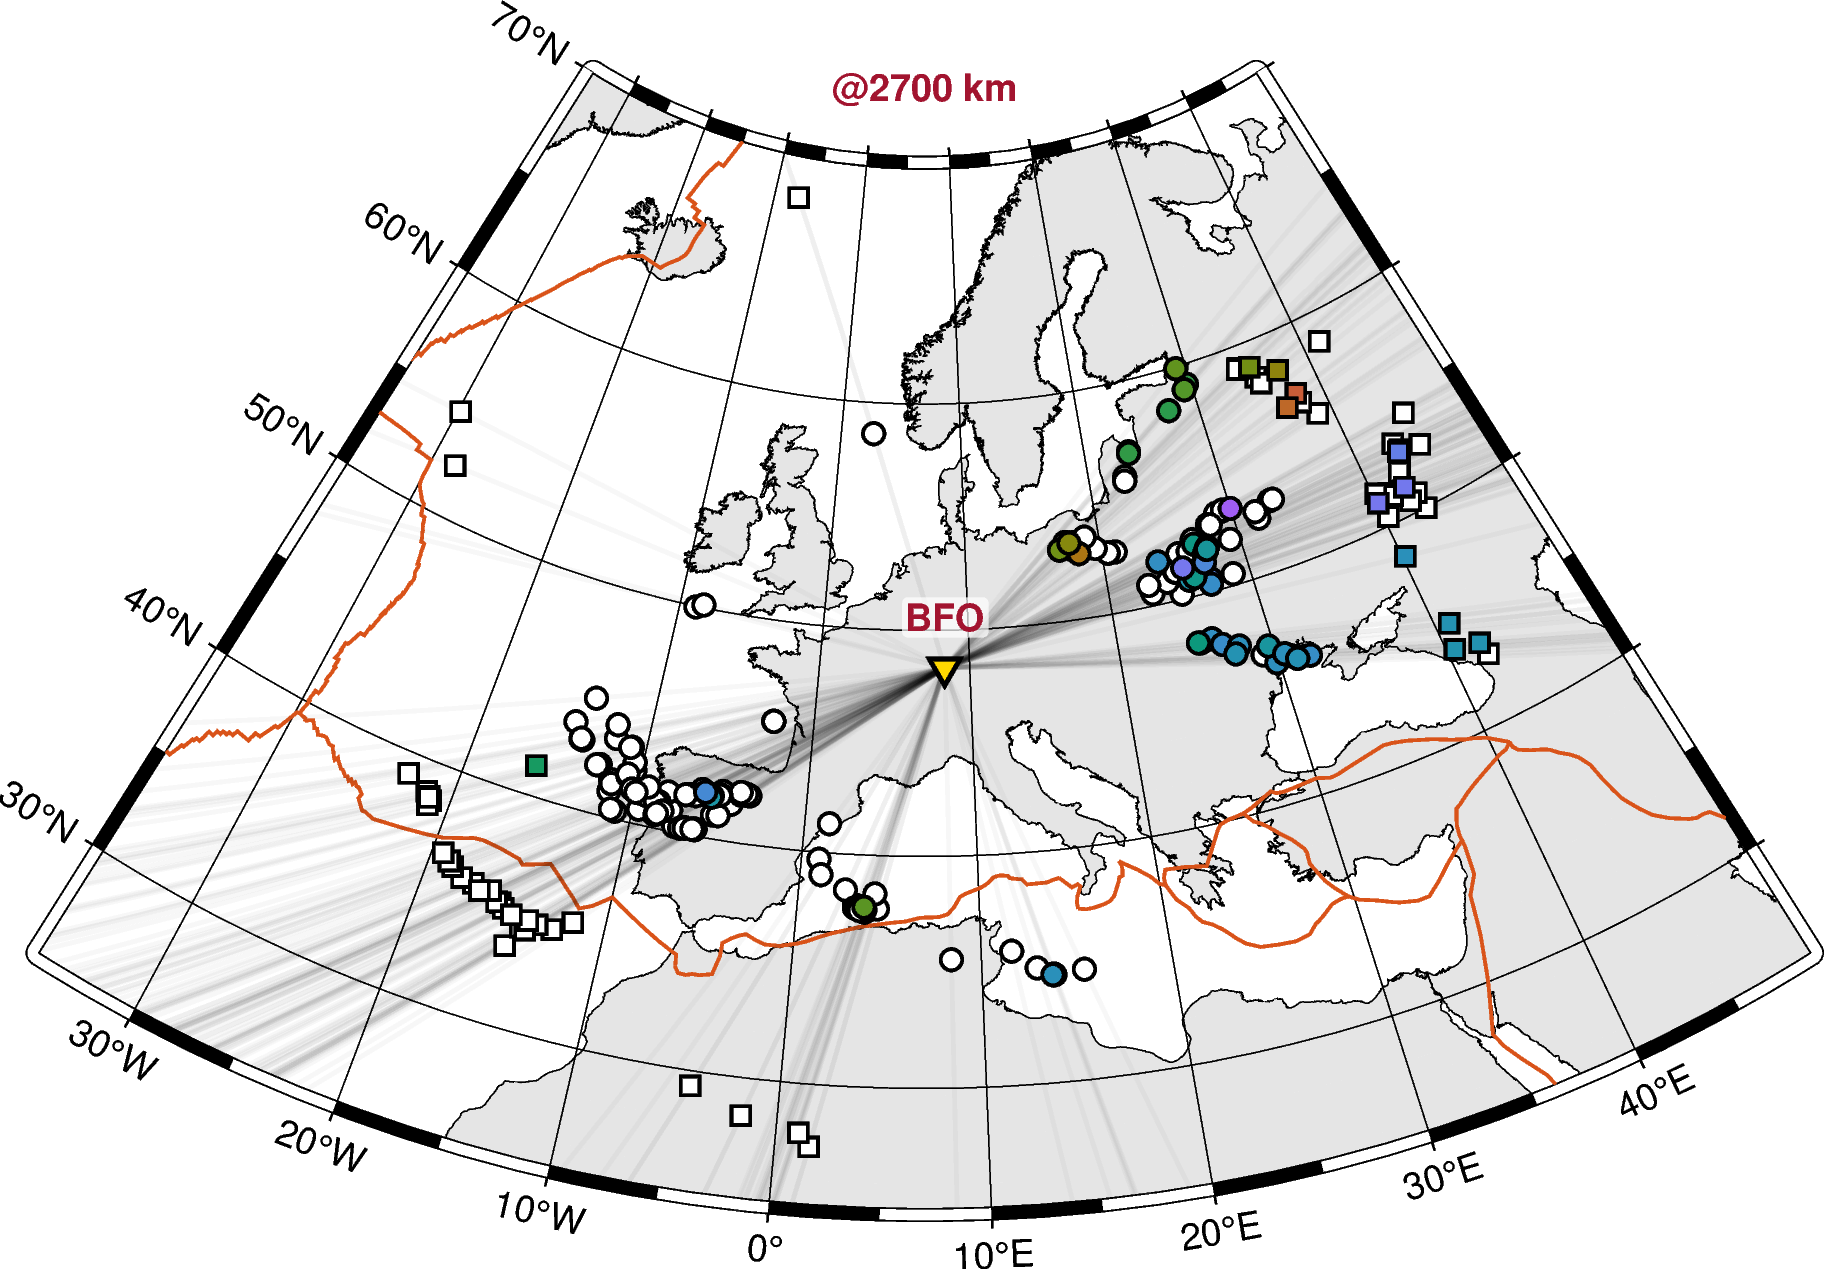

In [12]:
# -----------------------------------------------------------------------------
# Recording station BFO

# Add symbol
fig.plot(
    x=lon_BFO,
    y=lat_BFO,
    style="i0.3c",  # inverse triangle
    color=color_station_symbol,
    pen="1p,black",
)

# Add station code
fig.text(
    x=lon_BFO,
    y=49.020,
    text="BFO",
    font=[myfontsize, "Helvetica-Bold," + color_station_lable],
    offset="0c/0.3c",  # x/y
    fill="white@30",
    clearance="+tO",  # rounded edges of box
)

# -----------------------------------------------------------------------------
# Add depth of piercing points
fig.text(
    position="TC",  # Top Center
    text="@@2700 km",  # @@ ouputs @ sign in GMT
    font=[myfontsize, "Helvetica-Bold," + color_station_lable],
    fill="white@30",
)

fig.show()

Add a colorbar for the colormap _phase_ used for the fast polarization direction using the [`pygmt.Figure.colorbar`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.colorbar.html) method.

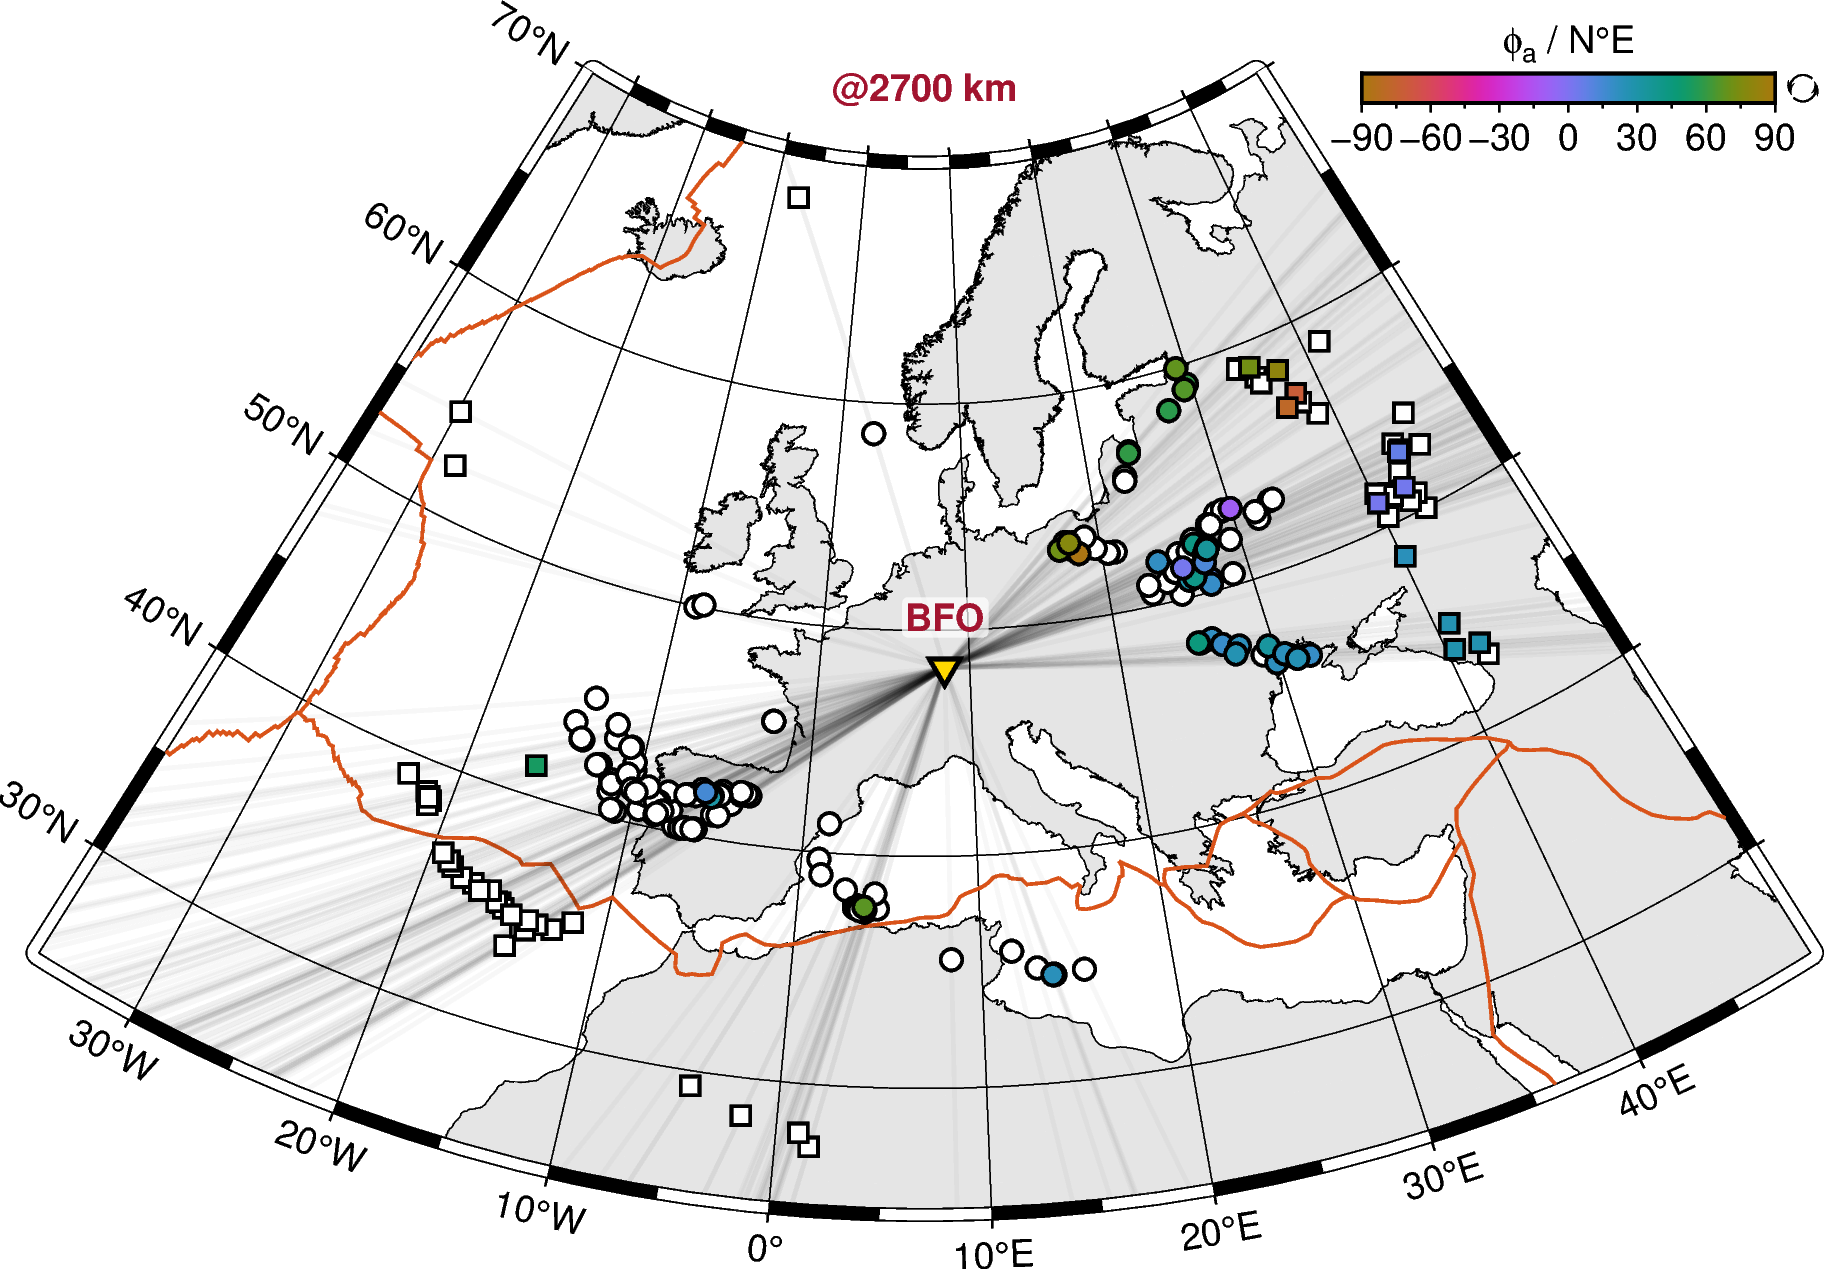

In [13]:
gmt.config(
    MAP_TICK_LENGTH_PRIMARY="2p",
)

# a annotations, here every 30 degrees
# f frame or ticks, here every 15 degrees
# +l lable
#   @~f@~  greek letter phi
#   @-a@-  subscript
#   @.     degree sign
colorbar_phi_frame = "a30f15+l@~f@~@-a@- / N@.E"

# J position, here Right Top
# +j justify, here Right Top
# +w width/hight
# +o offset x/y
# +h horizontal
# +ml label on top of colorbar
colorbar_phi_pos = "JRT+jRT+w3.5c/0.25c+o0.3c/0c+h+ml"

fig.colorbar(
    cmap=cmap_phi,
    position=colorbar_phi_pos,
    frame=colorbar_phi_frame,
)

fig.show()

Add legend for symbols of piercing points using the [`pygmt.Figure.legend`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.legend.html) method.

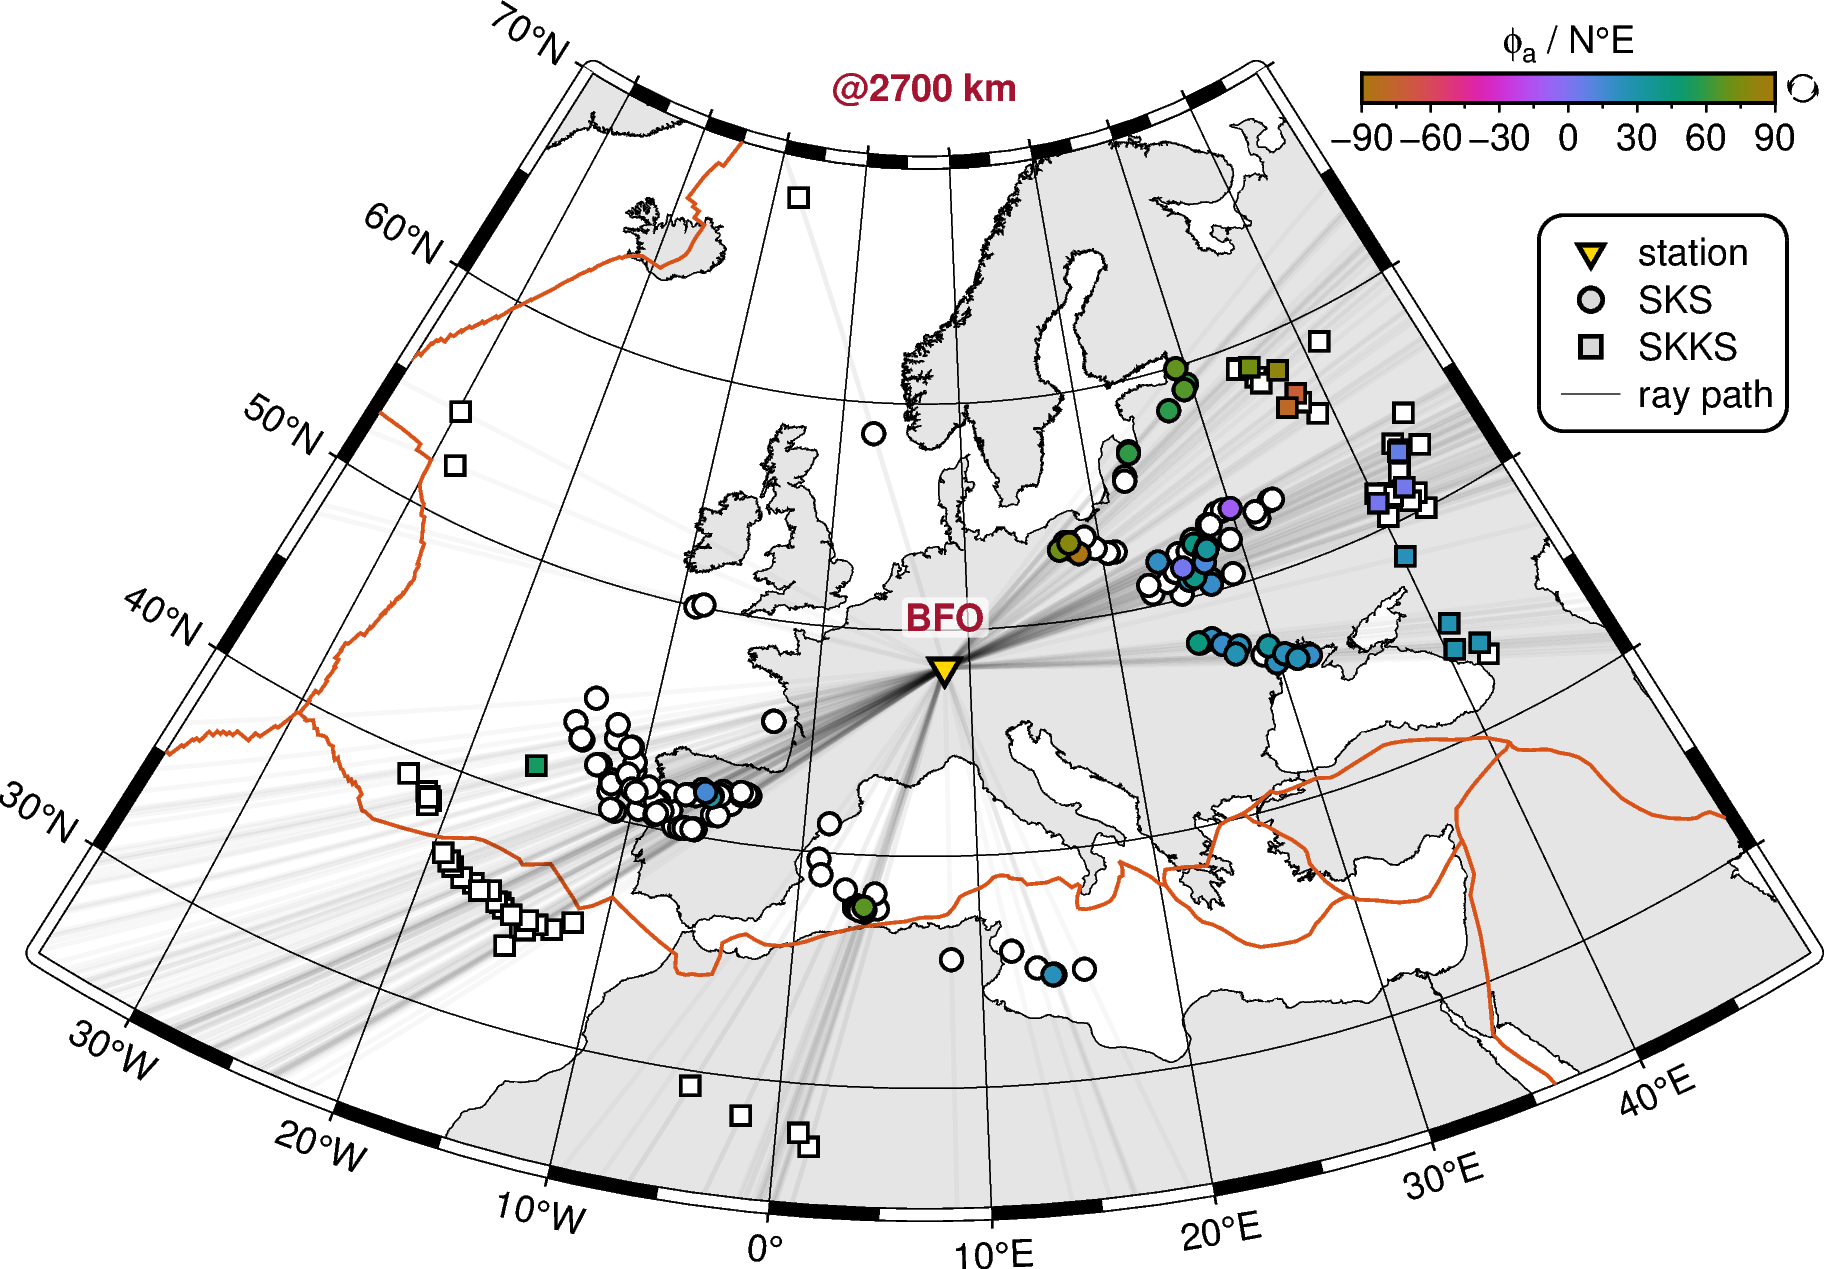

In [14]:
leg_file = "legend_gmt_swsm.txt"

# J position, here Right Top
# +j justify, here Left Top
# +w width
# +o offset x/y
legend_pos = "JRT+jLT+w2.1c+o-2.3c/1.2c"

fig.legend(
    spec=leg_file,
    position=legend_pos,
    box=box_standard,
)

fig.show()

# Remove colormap file
os.remove("phase_resampled_phi.cpt")

Using the [`pygmt.Figure.savefig`](https://www.pygmt.org/v0.7.0/api/generated/pygmt.Figure.savefig.html) method you can save the final figure. Indicate the desired file format by adding the corresponding extension to the file name passed through the `fname` parameter. For PNG format you may also set the resolution via the `dpi` parameter.

In [15]:
# Uncomment for PNG format
# fig.savefig(
#     fname=fname_fig_out + ".png",
#     dpi=mypngdpi,
# )

# Uncomment for PDF format
# fig.savefig(
#     fname=fname_fig_out + ".pdf",
# )

# Uncomment for EPS format
# fig.savefig(
#     fname=fname_fig_out + ".eps",
# )

print(fname_fig_out)

RFSG_FigS4_left_swsm


-------------------

**(3) References**

-------------------
[**_Bird, P. (2003)_**](https://doi.org/10.1029/2001GC000252).
An updated digital model of plate boundaries.
*Geochemistry, Geophysics, Geosystems*, volume 4, issue 3, page 1027.
https://doi.org/10.1029/2001GC000252.

[**_Thyng, K. M., Greene, C. A., Hetland, R. D., Zimmerle, H. M. & DiMarco, S. F. (2016)_**](http://dx.doi.org/10.5670/oceanog.2016.66).
True colors of oceanography: Guidelines for effective and accurate colormap selection.
*Oceanography*, volume 29, issue 3, pages 9-13.
http://dx.doi.org/10.5670/oceanog.2016.66.

[**_Uieda, L., Tian, D., Leong, W. J., Jones, M., Schlitzer, W., Grund, M., Toney, L., Yao, J., Magen, Y., Materna, K., Fröhlich, Y., Belem, A., Newton, T., Anant, A., Ziebarth, M., Quinn, J. & Wessel, P. (2022)_**](https://doi.org/10.5281/zenodo.6702566).
PyGMT: A Python interface for the Generic Mapping Tools, version v0.7.0.
*Zenodo*. https://doi.org/10.5281/zenodo.6702566.

[**_Wessel, P., Luis, J. F., Uieda, L., Scharroo, R., Wobbe, F., Smith, W. H. F. & Tian, D. (2019)_**](https://doi.org/10.1029/2019GC008515).
The Generic Mapping Tools version 6.
*Geochemistry, Geophysics, Geosystems*, 20, pages 5556-5564.
https://doi.org/10.1029/2019GC008515.

[**_Wessel, P., Luis, J. F., Uieda, L., Scharroo, R., Wobbe, F., Smith, W. H. F., Tian, D., Jones, M. & Esteban, F. (2022)_**](https://doi.org/10.5281/zenodo.6623271).
The Generic Mapping Tools, version 6.4.0.
*Zenodo*. https://doi.org/10.5281/zenodo.6623271.